# Unveiling Hidden Patterns and Optimal Strategies with Machine Learning
## Prepared by: Rob Eugene A. Dequiñon and John Kenneth P. Alon


### Chosen Dataset: Left 4 Dead 2 (2009) Player Stats
<i><b> Link: </b>https://www.kaggle.com/datasets/jacklacey/left-4-dead-2-20000-player-stats </i>

# Part A: Data Acquisition & Preprocessing

In [1]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('l4d2_player_stats_final.csv')

# Display the first 5 rows
df.head()

,Username,Playtime_(Hours),Pistol_Shots,Pistol_Kills,Pistol_Usage,Magnum_Shots,Magnum_Kills,Magnum_Usage,Uzi_Shots,Uzi_Kills,...,Knife_Usage,Molotovs_Thrown,Molotov_Kills,Pipe_Bombs_Thrown,Pipe_Bomb_Kills,Bile_Jars_Thrown,Bile_Jar_Hits,Most_Friendly_Fire,Difficulty,Average_Friendly_Fire
0,0,2433.577222,94665.0,10470.0,2.77,121222.0,27056.0,7.16,44666.0,5165.0,...,0.47,11166.0,99278.0,5817.0,23433.0,5802.0,12863.0,13653.0,Normal,142.0
1,1,121.879444,9136.0,1371.0,1.47,14928.0,6802.0,7.30,997.0,187.0,...,0.03,788.0,10141.0,977.0,6962.0,519.0,1557.0,1914.0,Expert,89.0
2,2,69.955278,4100.0,693.0,4.87,222.0,133.0,0.93,2834.0,271.0,...,0.00,23.0,130.0,445.0,1202.0,44.0,83.0,3195.0,Expert,58.0
3,3,48.421667,7369.0,1208.0,5.99,784.0,250.0,1.24,3322.0,496.0,...,0.00,135.0,1090.0,105.0,716.0,48.0,75.0,1412.0,Expert,76.0
4,4,307.639722,51944.0,9481.0,8.93,20545.0,6813.0,6.42,38224.0,5493.0,...,0.00,613.0,4797.0,515.0,4195.0,272.0,424.0,10851.0,Expert,112.0


In [2]:
# Basic info about the dataset
print('Shape:', df.shape)
print('\nInfo:')
df.info()
print('\nMissing values:')
print(df.isnull().sum())

Shape: (20830, 113)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20830 entries, 0 to 20829
Columns: 113 entries, Username to Average_Friendly_Fire
dtypes: float64(111), int64(1), object(1)
memory usage: 18.0+ MB

Missing values:
Username                 0
Playtime_(Hours)         0
Pistol_Shots             0
Pistol_Kills             0
Pistol_Usage             0
                        ..
Bile_Jars_Thrown         0
Bile_Jar_Hits            0
Most_Friendly_Fire       0
Difficulty               0
Average_Friendly_Fire    0
Length: 113, dtype: int64


In [3]:
# Descriptive statistics for numerical columns
df.describe()

,Username,Playtime_(Hours),Pistol_Shots,Pistol_Kills,Pistol_Usage,Magnum_Shots,Magnum_Kills,Magnum_Usage,Uzi_Shots,Uzi_Kills,...,Knife_Kills,Knife_Usage,Molotovs_Thrown,Molotov_Kills,Pipe_Bombs_Thrown,Pipe_Bomb_Kills,Bile_Jars_Thrown,Bile_Jar_Hits,Most_Friendly_Fire,Average_Friendly_Fire
count,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,...,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,2.083000e+04,20830.000000
mean,10414.500000,104.684003,12389.739558,2031.092127,8.035493,4948.215218,1984.546471,5.151902,7227.586990,1274.591119,...,18.040278,0.050348,248.814546,2000.592751,255.532117,1799.752184,120.713778,179.056313,4.976528e+04,81.363946
std,6013.247389,1974.873029,24198.764272,3944.710074,6.324443,16679.459523,8250.642273,5.586247,20501.115475,3779.680779,...,202.059539,0.302169,1333.472437,10028.704910,924.607365,6059.289202,586.911986,873.542727,6.928768e+06,879.579826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5207.250000,19.027153,3336.500000,519.000000,4.800000,522.000000,164.000000,1.580000,1204.000000,195.000000,...,0.000000,0.000000,33.000000,237.000000,43.000000,286.000000,15.000000,22.000000,3.010000e+02,35.000000
50%,10414.500000,36.110417,6568.000000,1060.000000,6.680000,1462.000000,502.000000,3.540000,2923.500000,506.000000,...,0.000000,0.000000,75.000000,583.000000,95.000000,658.000000,36.000000,58.000000,7.050000e+02,55.000000
75%,15621.750000,73.698333,12966.750000,2153.000000,9.470000,3918.000000,1446.000000,6.807500,6364.250000,1146.750000,...,0.000000,0.000000,175.000000,1388.750000,210.750000,1457.000000,86.000000,137.000000,1.441000e+03,88.000000
max,20829.000000,277827.960278,608711.000000,131565.000000,100.000000,627966.000000,411640.000000,100.000000,731767.000000,152921.000000,...,18605.000000,21.320000,125856.000000,635486.000000,55566.000000,249158.000000,41774.000000,87673.000000,1.000000e+09,121347.000000


In [4]:
# Value counts for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f'\nValue counts for {col}:')
    print(df[col].value_counts())


Value counts for Difficulty:
Difficulty
Normal      8099
Expert      6968
Advanced    3974
Easy        1789
Name: count, dtype: int64


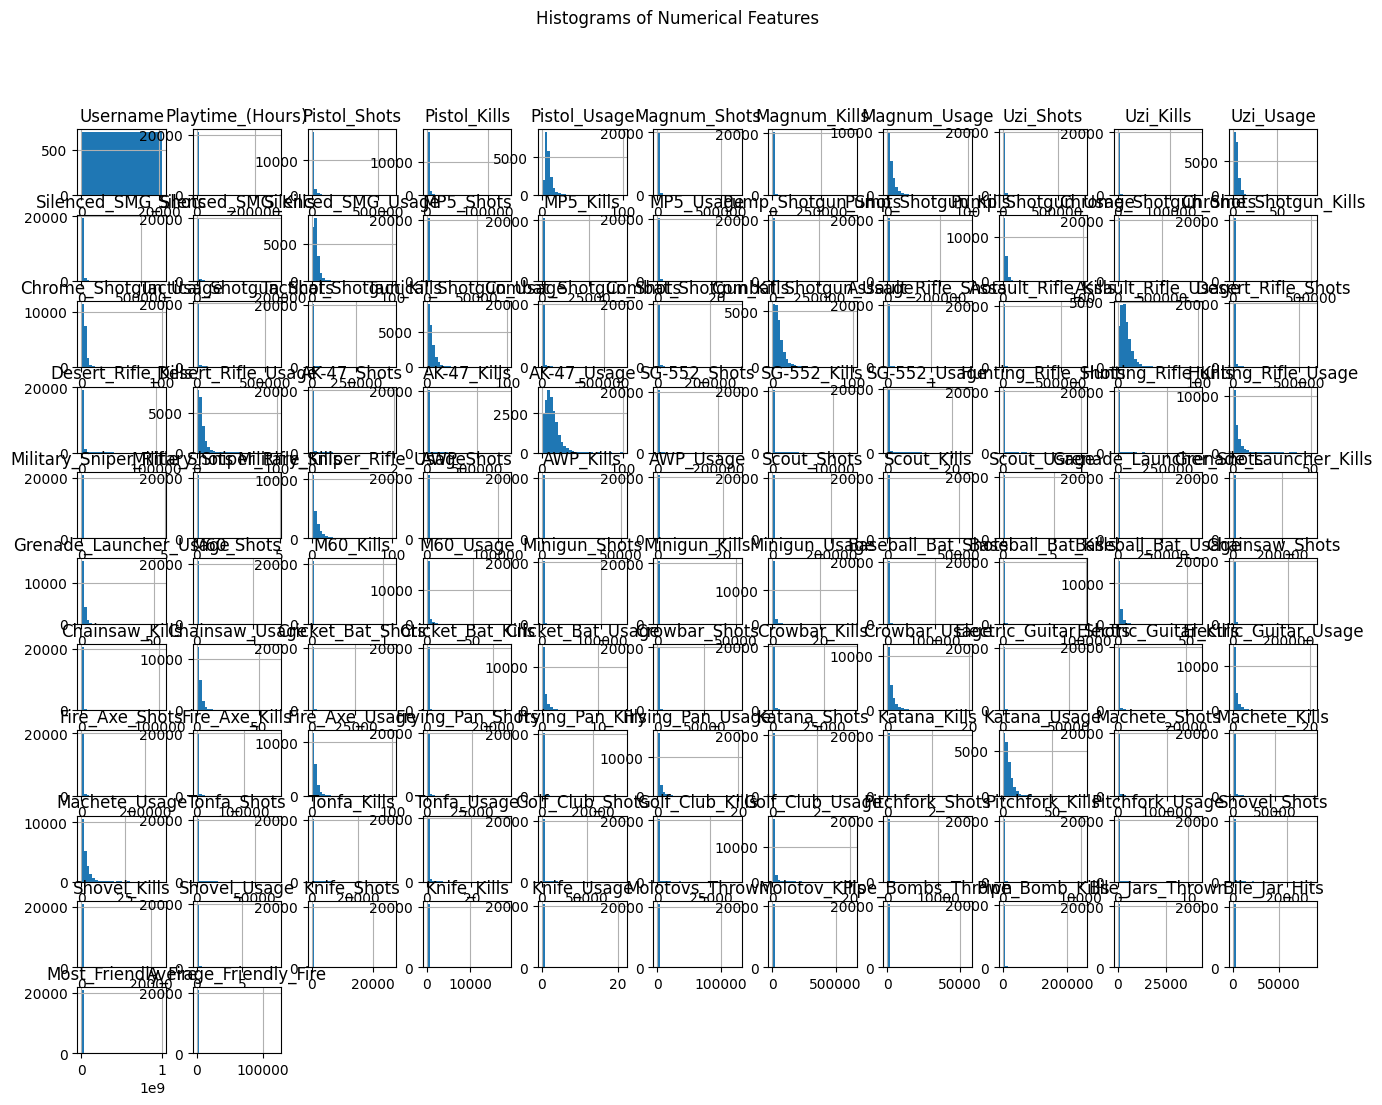

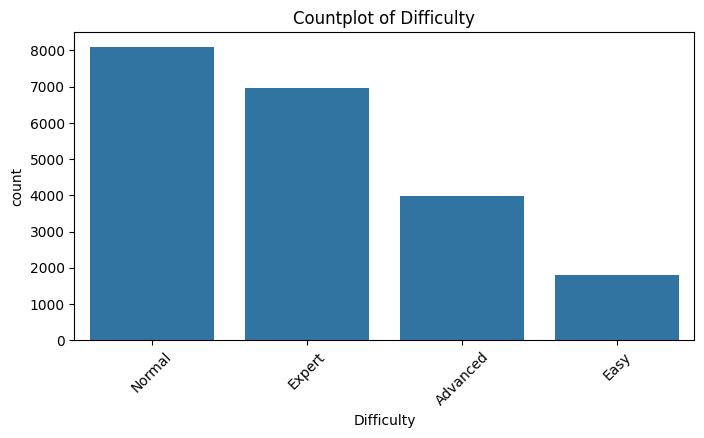

In [5]:
# Visual EDA: Histograms for numerical columns
df.hist(figsize=(16, 12), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Visual EDA: Countplots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

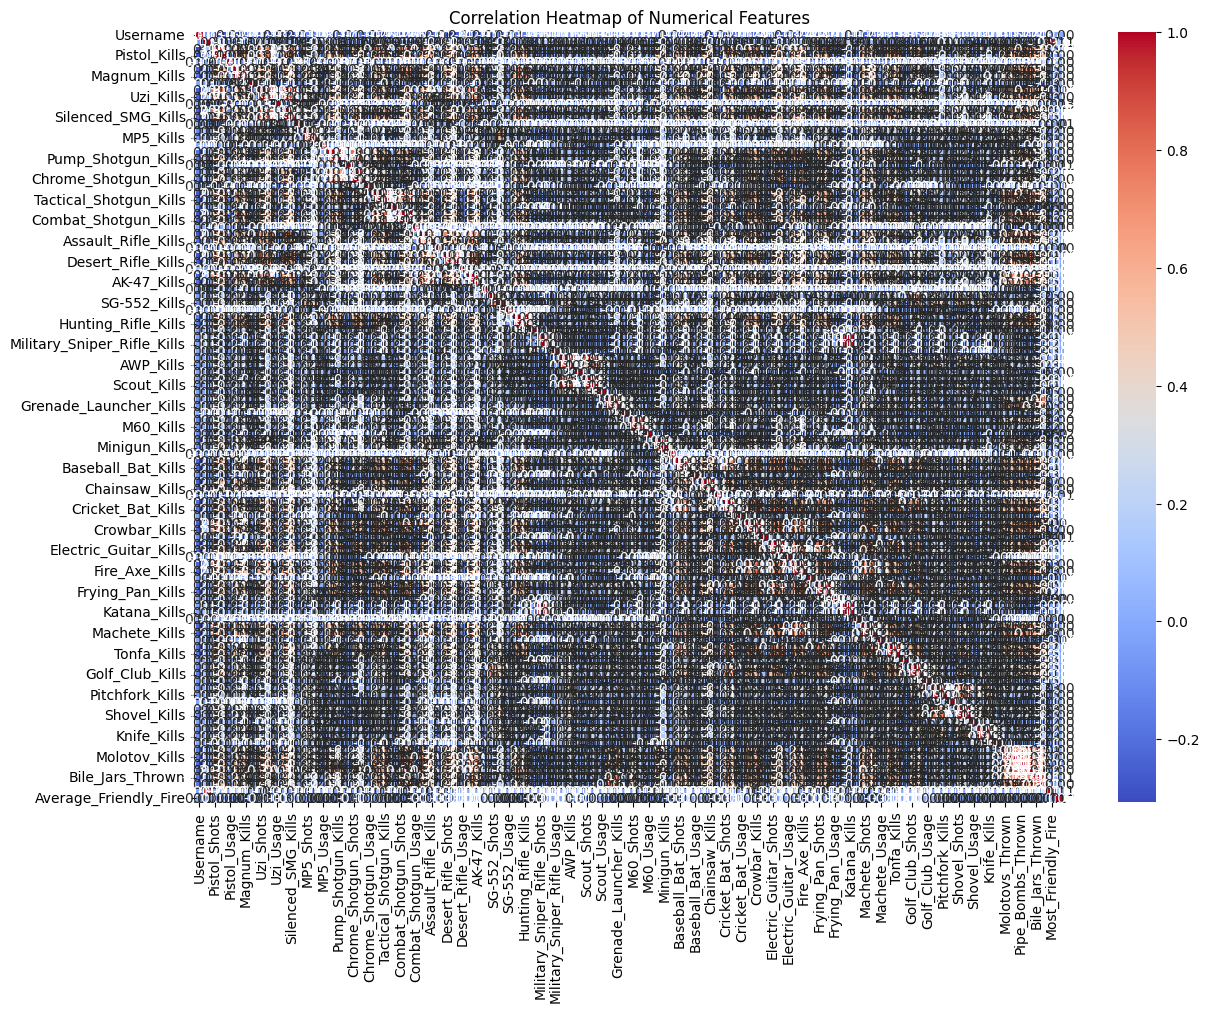

In [6]:
# Correlation heatmap for numerical features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()